In [9]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import wrangle
import prepare

## Exercises I - Required

Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer. 

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named `explore.ipynb`. In addition, you should create a file named `explore.py` that contains the following functions for exploring your variables (features & target).

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [10]:
df =  wrangle.wrangle_telco()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 6154
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 66.2+ KB


In [166]:
train, validate, test = wrangle.split_data(df)

train -> (949, 4)
validate -> (407, 4)
test -> (339, 4)


**2. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.**

In [167]:
#check my df
train.head()

,customer_id,monthly_charges,tenure,total_charges
5716,3097-FQTVJ,20.00,41,810.30
225,3902-MIVLE,75.70,63,4676.70
2455,0853-TWRVK,105.60,72,7581.50
2421,0013-SMEOE,109.70,71,7904.25
2617,4822-LPTYJ,103.75,72,7346.20


In [168]:
#check my info
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 5716 to 6053
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      949 non-null    object 
 1   monthly_charges  949 non-null    float64
 2   tenure           949 non-null    int64  
 3   total_charges    949 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 37.1+ KB


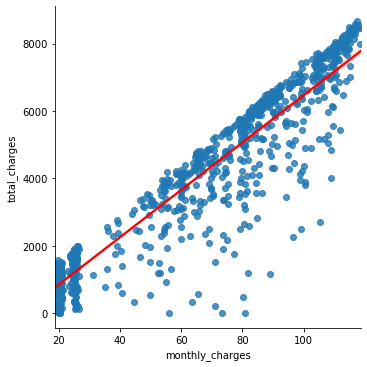

In [169]:
# plot for one pair
sns.lmplot(x="monthly_charges", y="total_charges", data=train, line_kws={'color': 'red'})
plt.show()

In [170]:
# I need my target and the list of the featues

In [171]:
#set my target
y= 'total_charges'

In [172]:
#get the list of the columns  that are not object type
columns = list(train.select_dtypes(exclude= 'O').columns)
columns

['monthly_charges', 'tenure', 'total_charges']

In [173]:
#we need to removed the target from the columns
columns.remove(y)


In [174]:

columns

['monthly_charges', 'tenure']

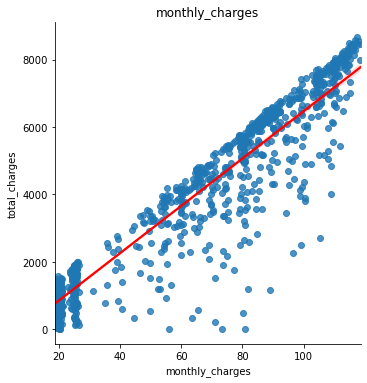

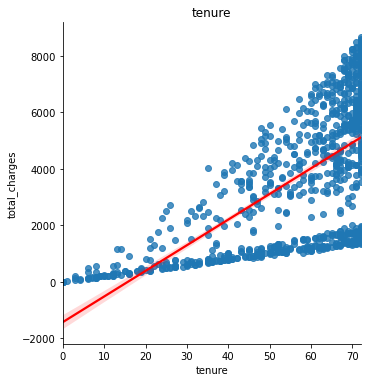

In [175]:
#lets do for more than one pair
for col in columns:
    sns.lmplot(x= col, y=y, data=train, line_kws={'color': 'red'})
    plt.title(col)
    plt.show()

In [176]:
#lets create a function

def plot_variable_pairs(df, target):
    '''
    Takes in a dataframe and a target and returns  plots of all the pairwise relationships 
    along with the regression line for each pair.
    '''
    
    # get the list of the columns  that are not object type
    columns = list(train.select_dtypes(exclude= 'O').columns)
    #remove target from columns
    columns.remove(target)
    
    #plot
    for col in columns:
        sns.lmplot(x= col, y= target, data=df, line_kws={'color': 'red'})
        plt.title(col)
        plt.show()
    
    


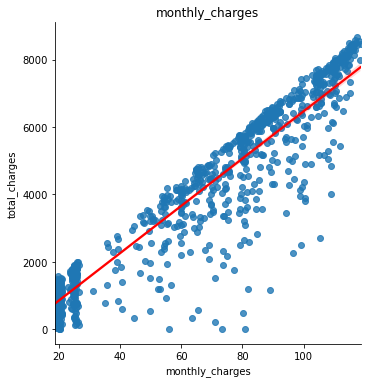

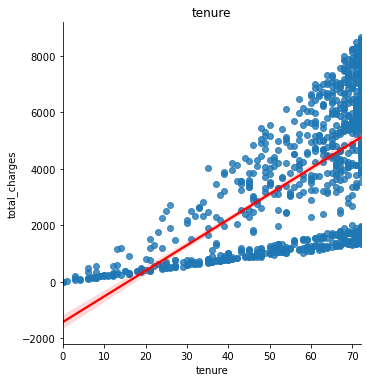

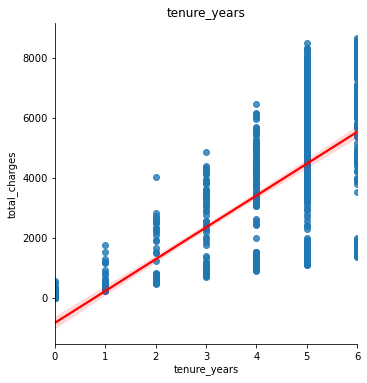

In [127]:
plot_variable_pairs (train, 'total_charges')

In [138]:
def plot_variable_pairs2(df):
    
    columns = df[list(df.select_dtypes(exclude='O').columns)]
    
    sns.pairplot(columns, kind="reg", plot_kws={'line_kws':{'color':'red'}}, corner=True)
    plt.show()

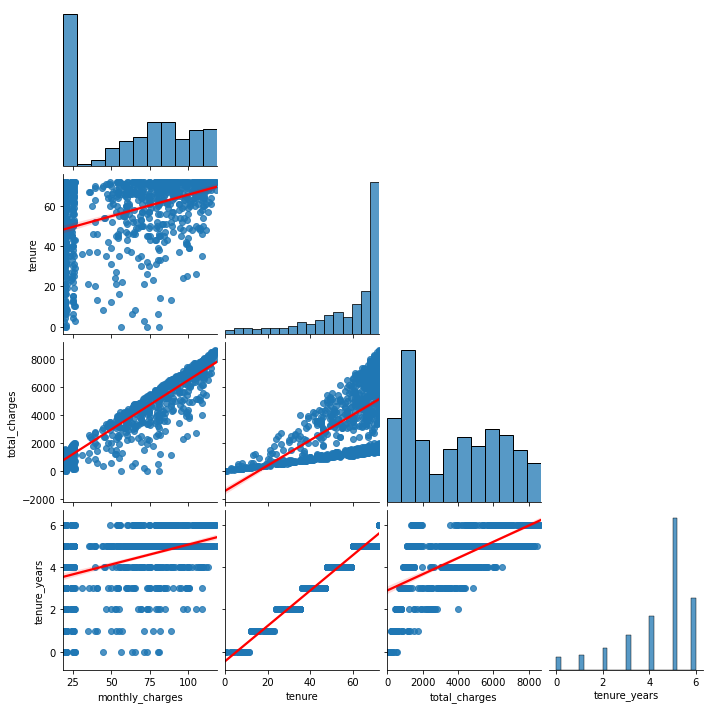

In [139]:
plot_variable_pairs2(train)

**3. Write a function named `months_to_years` that accepts your telco churn dataframe and returns a dataframe with a new feature `tenure_years`, in complete years as a customer.**

In [13]:
#how I calculate years
train['tenure'] /12

5716    3.416667
225     5.250000
2455    6.000000
2421    5.916667
2617    6.000000
          ...   
441     5.500000
98      6.000000
2679    5.916667
322     5.000000
6053    5.333333
Name: tenure, Length: 949, dtype: float64

In [14]:
# using  // gives you completed years. (**floor division discards the fractional part***)
(train['tenure']//12).head()

5716    3
225     5
2455    6
2421    5
2617    6
Name: tenure, dtype: int64

In [15]:
#create a new column
train['tenure_years'] = (train['tenure']//12)

In [16]:
train['tenure_years'].head()

5716    3
225     5
2455    6
2421    5
2617    6
Name: tenure_years, dtype: int64

In [177]:
def months_to_years (df):
    '''
    Takes in the telco_churn dataframe and returns a dataframe with a new feature tenure_years, 
    in complete years as a customer
    '''
    df['tenure_years'] = (df['tenure']//12)
    

I dont need to return any value in the function above. (Implicit return Statements)
- "If your function performs actions but doesn’t have a clear and useful return value, then you can omit returning None because doing that would just be superfluous and confusing. You can also use a bare return without a return value just to make clear your intention of returning from the function."

source: https://realpython.com/python-return-statement/

In [178]:
# *** I get my  train df again** train, validate, test = wrangle.split_data(df)
train.head(1)

,customer_id,monthly_charges,tenure,total_charges
5716,3097-FQTVJ,20.0,41,810.3


In [179]:
months_to_years (train)

In [180]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
5716,3097-FQTVJ,20.00,41,810.30,3
225,3902-MIVLE,75.70,63,4676.70,5
2455,0853-TWRVK,105.60,72,7581.50,6
2421,0013-SMEOE,109.70,71,7904.25,5
2617,4822-LPTYJ,103.75,72,7346.20,6


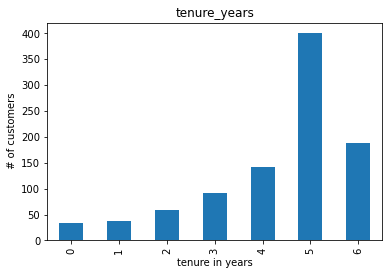

In [124]:
train['tenure_years'].value_counts().sort_index(ascending= True).plot.bar()
plt.title('tenure_years')
plt.xlabel('tenure in years')
plt.ylabel(' # of customers')
plt.show()

***4. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.***

In [55]:
#lest see the vaues, so for me it is categorical
train['tenure_years'].value_counts().sort_index(ascending= True)

0     33
1     38
2     58
3     91
4    141
5    400
6    188
Name: tenure_years, dtype: int64

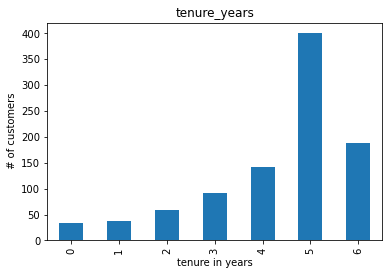

In [56]:
train['tenure_years'].value_counts().sort_index(ascending= True).plot.bar()
plt.title('tenure_years')
plt.xlabel('tenure in years')
plt.ylabel(' # of customers')
plt.show()

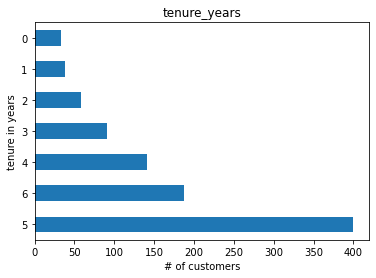

In [34]:
train['tenure_years'].value_counts().plot.barh()
plt.title('tenure_years')
plt.xlabel('# of customers')
plt.ylabel('tenure in years')
plt.show()

### categorical with  Continuous

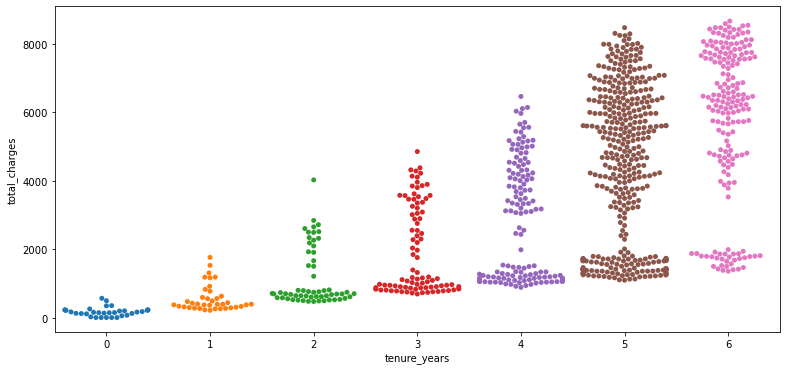

In [64]:
plt.figure(figsize=(13, 6))
sns.swarmplot(x='tenure_years', y='total_charges', data=train)
plt.show()

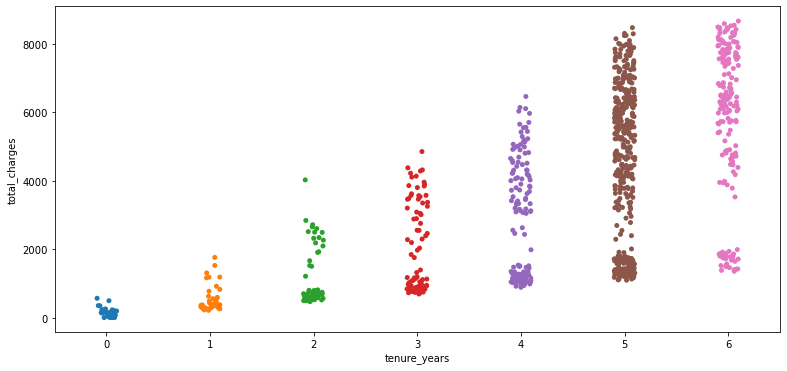

In [68]:
plt.figure(figsize=(13, 6))
sns.stripplot(x='tenure_years', y='total_charges', data=train)
plt.show()

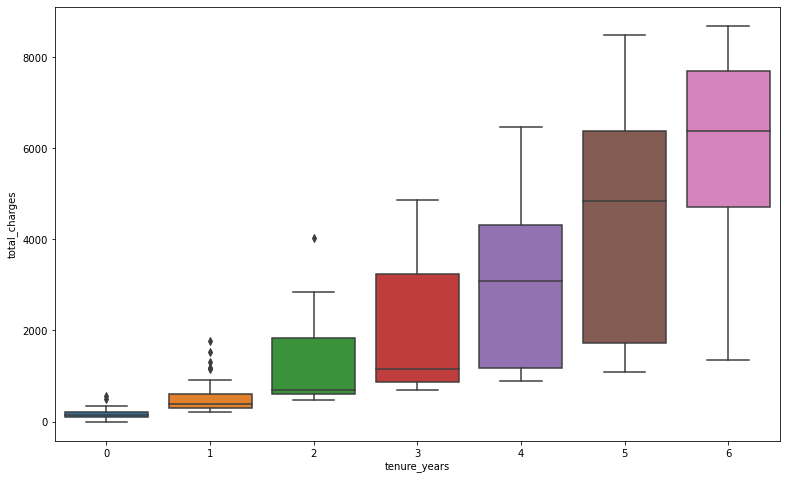

In [70]:
plt.figure(figsize=(13, 8))
sns.boxplot(x='tenure_years', y='total_charges', data=train)
plt.show()

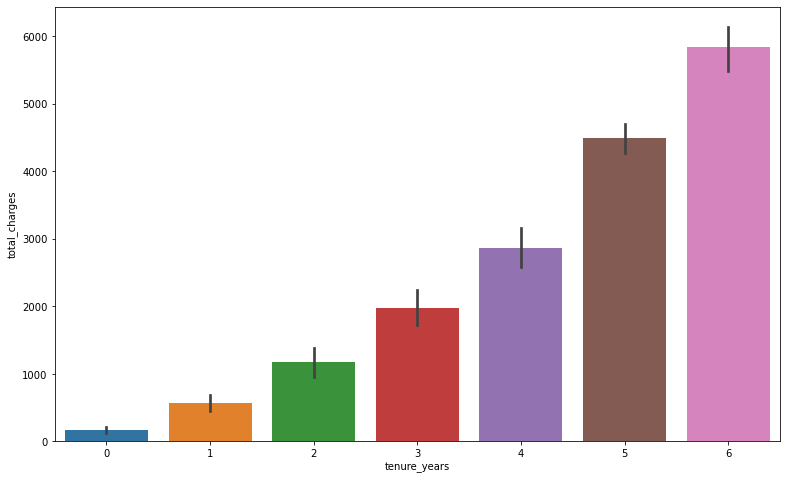

In [76]:
plt.figure(figsize=(13, 8))
sns.barplot(x='tenure_years', y='total_charges', data=train)
plt.show()

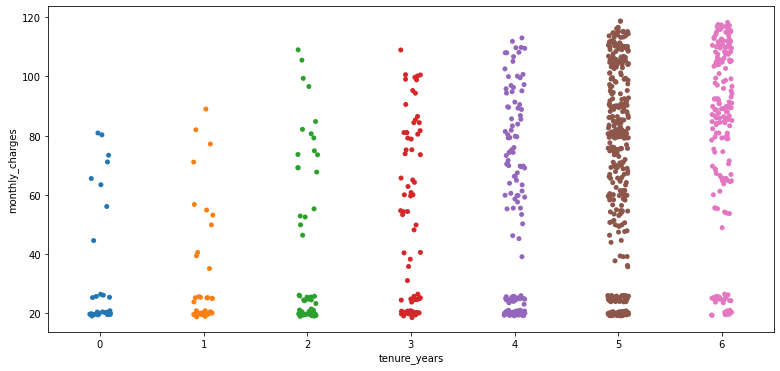

In [93]:
plt.figure(figsize=(13, 6))
sns.stripplot(x='tenure_years', y='monthly_charges', data=train)
plt.show()

###   Continuous

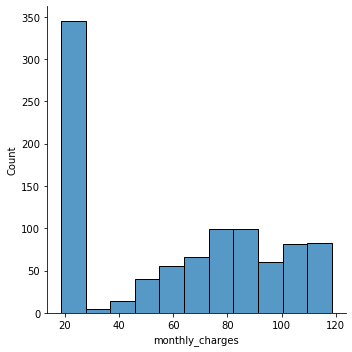

In [79]:
sns.displot(train['monthly_charges'])

<AxesSubplot:xlabel='monthly_charges'>

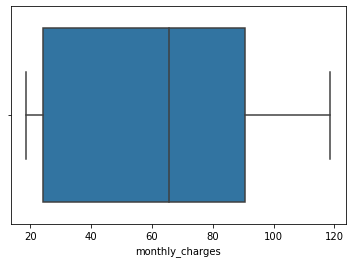

In [47]:
sns.boxplot(train['monthly_charges'])

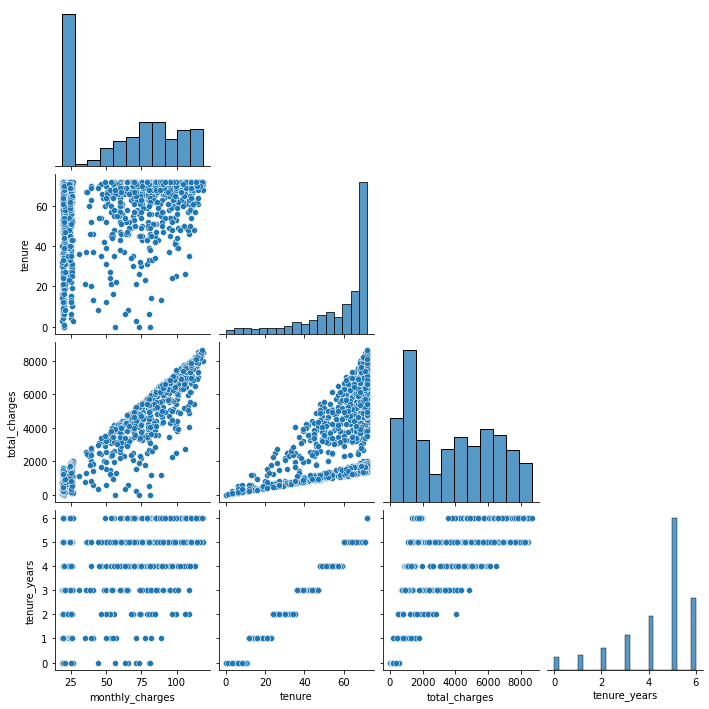

In [137]:
# We can drop the redundant information in the upper right half of the chart if we like.

sns.pairplot(train, corner=True)

### Continuous with Continuous

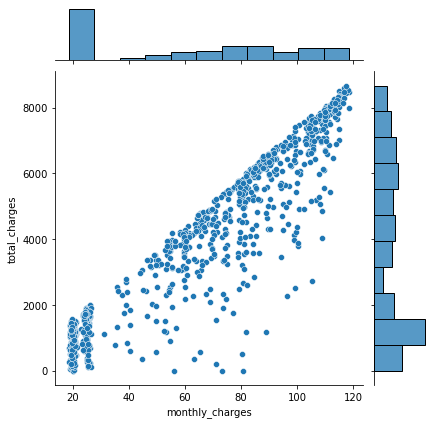

In [130]:
sns.jointplot('monthly_charges', 'total_charges', data = train, kind='scatter')

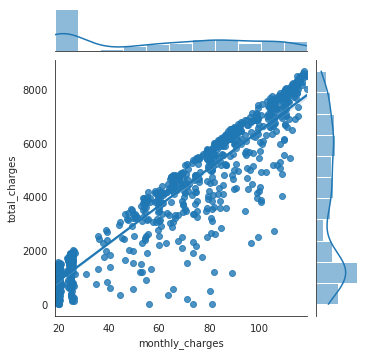

In [136]:
with sns.axes_style('white'):
    j = sns.jointplot(x='monthly_charges', y='total_charges', data=train,  kind='reg', height=5, palette= 'red');
plt.show()

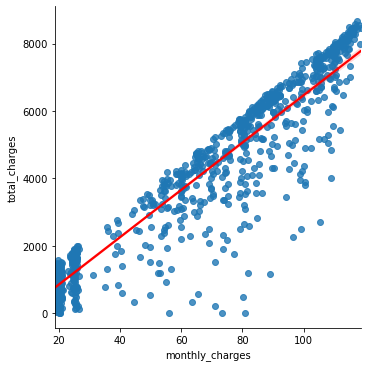

In [128]:
# plot for one pair
sns.lmplot(x="monthly_charges", y="total_charges", data=train, line_kws={'color': 'red'})
plt.show()

In [89]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
5716,3097-FQTVJ,20.00,41,810.30,3
225,3902-MIVLE,75.70,63,4676.70,5
2455,0853-TWRVK,105.60,72,7581.50,6
2421,0013-SMEOE,109.70,71,7904.25,5
2617,4822-LPTYJ,103.75,72,7346.20,6


In [90]:
train[['monthly_charges', 'total_charges']].describe()

,monthly_charges,total_charges
count,949.000000,949.000000
mean,61.483878,3766.654584
std,34.248775,2553.738773
min,18.550000,0.000000
25%,24.300000,1311.750000
50%,65.550000,3772.500000
75%,90.450000,6045.900000
max,118.650000,8670.100000


(array([345.,   7.,  19.,  49.,  75.,  69., 119.,  82.,  89.,  95.]),
 array([ 18.55,  28.56,  38.57,  48.58,  58.59,  68.6 ,  78.61,  88.62,
         98.63, 108.64, 118.65]),
 <BarContainer object of 10 artists>)

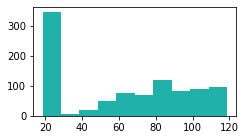

In [92]:

plt.figure(figsize=(8,2))

plt.subplot(1, 2, 1)
plt.hist(train['monthly_charges'], color='lightseagreen')


<AxesSubplot:>

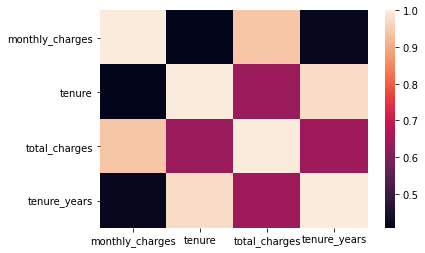

In [60]:
sns.heatmap(train.corr())

In [94]:
train.head(1)

,customer_id,monthly_charges,tenure,total_charges,tenure_years
5716,3097-FQTVJ,20.0,41,810.3,3


In [95]:
train_corr = train.drop(columns=['customer_id', 'tenure']).corr()
train_corr

,monthly_charges,total_charges,tenure_years
monthly_charges,1.000000,0.940536,0.416867
total_charges,0.940536,1.000000,0.638752
tenure_years,0.416867,0.638752,1.000000


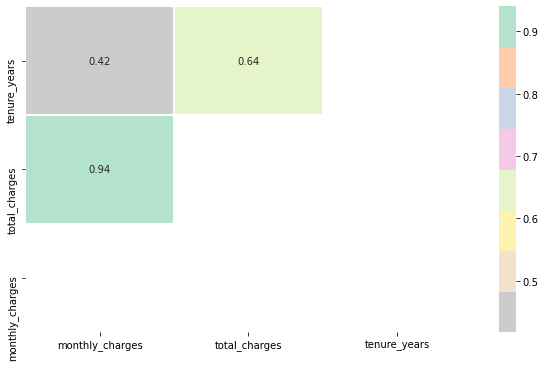

In [123]:
plt.figure(figsize=(10,6))
sns.heatmap(train_corr, cmap='Pastel2_r', annot=True, linewidth=0.5, mask= np.triu(train_corr))
plt.ylim(0, 3)

plt.show()

In [ ]:
#creating a function

In [ ]:
#Discrete with Continuous
plt.figure(figsize=(13, 8))
sns.boxplot(x='tenure_years', y='total_charges', data=train)

plt.figure(figsize=(13, 6))
sns.swarmplot(x='tenure_years', y='total_charges', data=train)


plt.figure(figsize=(13, 8))
sns.barplot(x='tenure_years', y='total_charges', data=train)

In [ ]:
# Continuous with Continuous

sns.pairplot(columns, kind="reg", plot_kws={'line_kws':{'color':'red'}}, corner=True)
plt.show()


sns.heatmap(train_corr, cmap='Pastel2_r', annot=True, linewidth=0.5, mask= np.triu(train_corr))
plt.ylim(0, 3)

# plot for one pair
sns.lmplot(x="monthly_charges", y="total_charges", data=train, line_kws={'color': 'red'})
plt.show()

In [ ]:
    print('heatmap')
    lis= continuous.append(categorical)
    df_corr= df[lis ].corr()
    sns.heatmap(df_corr, cmap='Pastel2_r', annot=True, linewidth=0.5, mask= np.triu(df_corr))
    x= len(categorical) + len(continuous)
    plt.ylim(0, x)

In [164]:
def plot_categorical_and_continuous_vars (df, categorical, continuous):
    print('Discrete with Continuous')
    for cat in categorical:
        for cont in continuous:
            sns.boxplot(x= cat, y=cont, data=df)
            plt.show()
    print('Continuous with Continuous')        
    sns.pairplot(df[continuous], kind="reg", plot_kws={'line_kws':{'color':'red'}}, corner=True)


Discrete with Continuous


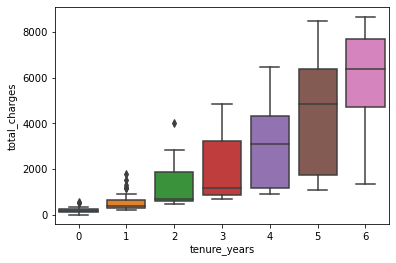

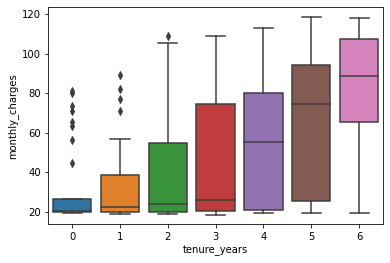

Continuous with Continuous


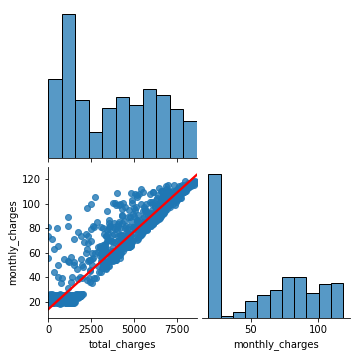

In [165]:
plot_categorical_and_continuous_vars (train, ['tenure_years'], ['total_charges','monthly_charges'])

In [ ]:
train_corr = train.drop(columns=['customer_id', 'tenure']).corr()

5. Save the functions you have written to create visualizations in your `explore.py` file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Explore your dataset with any other visualizations you think will be helpful.

7. In a seperate notebook, use the functions you have developed in this exercise with the `mall_customers` dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make `spending_score` your target variable.